# Intro to PyBaMM

## Lesson 1: Running Pybamm

### First steps with PyBaMM

In [68]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

In [27]:
model = pybamm.lithium_ion.DFN()
simulation = pybamm.Simulation(model)
sim = simulation.solve([0, 3600])
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

### Comparing different models

In [28]:
models = [
	pybamm.lithium_ion.SPM(),
	pybamm.lithium_ion.SPMe(),
	pybamm.lithium_ion.DFN(),
]

simulations = []
for model in models:
	simulation = pybamm.Simulation(model)
	simulation.solve([0, 3600])
	simulations.append(simulation)
	
pybamm.dynamic_plot(simulations)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

### Basic plotting

In [29]:
output_variables = ["Voltage [V]", "Current [A]"]
simulation.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [30]:
output_variables = [
	"Voltage [V]", 
	["Electrode current density [A.m-2]", "Electrolyte current density [A.m-2]"]
]
simulation.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [31]:
model.variable_names()

['Time [s]',
 'Time [min]',
 'Time [h]',
 'x [m]',
 'x_n [m]',
 'x_s [m]',
 'x_p [m]',
 'r_n [m]',
 'r_p [m]',
 'Current variable [A]',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Throughput capacity [A.h]',
 'Discharge energy [W.h]',
 'Throughput energy [W.h]',
 'Porosity',
 'Negative electrode porosity',
 'X-averaged negative electrode porosity',
 'Separator porosity',
 'X-averaged separator porosity',
 'Positive electrode porosity',
 'X-averaged positive electrode porosity',
 'Porosity change',
 'Negative electrode porosity change [s-1]',
 'X-averaged negative electrode porosity change [s-1]',
 'Separator porosity change [s-1]',
 'X-averaged separator porosity change [s-1]',
 'Positive electrode porosity change [s-1]',
 'X-averaged positive electrode porosity change [s-1]',
 'Negative electrode interface utilisation variable',
 'X-averaged negative electrode interface utilisation variable',
 'Negative electrode interface utilisation',


In [32]:
model.variables.search("electrolyte")

Electrolyte concentration [Molar]
Electrolyte concentration [mol.m-3]
Electrolyte concentration concatenation [mol.m-3]
Electrolyte convection flux [mol.m-2.s-1]
Electrolyte current density [A.m-2]
Electrolyte diffusion flux [mol.m-2.s-1]
Electrolyte flux [mol.m-2.s-1]
Electrolyte migration flux [mol.m-2.s-1]
Electrolyte potential [V]
Electrolyte transport efficiency
Gradient of electrolyte potential [V.m-1]
Gradient of negative electrolyte potential [V.m-1]
Gradient of positive electrolyte potential [V.m-1]
Gradient of separator electrolyte potential [V.m-1]
Loss of lithium inventory, including electrolyte [%]
Negative electrolyte concentration [Molar]
Negative electrolyte concentration [mol.m-3]
Negative electrolyte potential [V]
Negative electrolyte transport efficiency
Positive electrolyte concentration [Molar]
Positive electrolyte concentration [mol.m-3]
Positive electrolyte potential [V]
Positive electrolyte transport efficiency
Separator electrolyte concentration [Molar]
Separat

### Changing the parameters

In [33]:
parameter_values = pybamm.ParameterValues("Chen2020")

simulation = pybamm.Simulation(model, parameter_values=parameter_values)
sim = simulation.solve([0, 3600])
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=3555.448018330494, step=35.55448018330494), …

### Running experiments

In [34]:
simulation = pybamm.Simulation(model, experiment="Discharge at 3C until 3.3 V")

### Printing citation

In [35]:
pybamm.print_citations()

[1] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[2] Chang-Hui Chen, Ferran Brosa Planella, Kieran O'Regan, Dominika Gastol, W. Dhammika Widanage, and Emma Kendrick. Development of Experimental Techniques for Parameterization of Multi-scale Lithium-ion Battery Models. Journal of The Electrochemical Society, 167(8):080534, 2020. doi:10.1149/1945-7111/ab9050.
[3] Marc Doyle, Thomas F. Fuller, and John Newman. Modeling of galvanostatic charge and discharge of the lithium/polymer/insertion cell. Journal of the Electrochemical society, 140(6):1526–1533, 1993. doi:10.1149/1.2221597.
[4] Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, and others. Array programming with

## Lesson 2: The Experiment class

In [36]:
experiment = pybamm.Experiment([
    "Discharge at 1C until 3.3 V",
    "Charge at 0.3C until 4.0 V",
    "Hold at 4.0 V until C/100",
])
simulation = pybamm.Simulation(model, experiment=experiment)
solution = simulation.solve([0, 3600])
solution.cycles[0].plot()
solution.cycles[1].plot()
solution.plot()

2024-06-21 09:40:39.079 - [WARNING] simulation.solve(590): Ignoring t_eval as solution times are specified by the experiment


interactive(children=(FloatSlider(value=0.0, description='t', max=3554.8346439614356, step=35.548346439614356)…

interactive(children=(FloatSlider(value=0.9874540677673432, description='t', max=4.806270923359989, min=0.9874…

interactive(children=(FloatSlider(value=0.0, description='t', max=5.095762441376283, step=0.05095762441376283)…

In [37]:
experiment2 = pybamm.Experiment([
    (
        "Discharge at C/4 until 2.5 V",
        "Charge at C/4 until 4.2 V",
        "Hold at 4.2 V until C/100"
    ),
    (
        "Discharge at C/2 until 2.5 V",
        "Charge at C/2 until 4.2 V",
        "Hold at 4.2 V until C/100"
    )
])
simulation2 = pybamm.Simulation(model, experiment=experiment2)
sim2 = simulation2.solve([0, 3600])
simulation2.plot()

2024-06-21 09:40:42.985 - [WARNING] simulation.solve(590): Ignoring t_eval as solution times are specified by the experiment
At t = 273.579, , mxstep steps taken before reaching tout.
At t = 518.942 and h = 2.82406e-17, the corrector convergence failed repeatedly or with |h| = hmin.


interactive(children=(FloatSlider(value=0.0, description='t', max=15.628642438853326, step=0.15628642438853327…

In [38]:
sim2.cycles[0].steps[1].plot()

interactive(children=(FloatSlider(value=4.200868332206537, description='t', max=9.66990731414445, min=4.200868…

In [39]:
experiment3 = pybamm.Experiment(
    # Initialize
    [
        "Hold at 4.2 V until C/100",
        "Rest for 4 hours",
    ] +
    # Capacity check
    [(
        "Discharge at C/10 until 2.5 V",
        "Charge at C/10 until 4.2 V",
        "Hold at 4.2 V until C/100"
    )] +  
    # Ageing cycles
    [(
        "Discharge at 1C until 2.5 V",
        "Charge at 0.3C until 4.2 V",
        "Hold at 4.2 V until C/100",
    )] * 10 +
    # Capacity check
    [(
        "Discharge at C/10 until 2.5 V",
        "Charge at C/10 until 4.2 V",
        "Hold at 4.2 V until C/100"
    )]  
)

simulation3 = pybamm.Simulation(model, experiment=experiment3)
sim3 = simulation3.solve([0, 3600])
simulation3.plot()

2024-06-21 09:40:54.184 - [WARNING] simulation.solve(590): Ignoring t_eval as solution times are specified by the experiment
At t = 28.4004 and h = 1.78326e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 28.4005 and h = 6.01091e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 28.4005 and h = 7.29157e-13, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 28.4004 and h = 4.9943e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 28.4005 and h = 3.06573e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 334.034 and h = 5.89358e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 526.473 and h = 2.13775e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 334.037, , mxstep steps taken before reaching tout.
At t = 526.473 and h = 7.7449e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 334.037, , 

interactive(children=(FloatSlider(value=0.0, description='t', max=121.18470514562605, step=1.2118470514562605)…

## Lesson 3: Parameter Sets

In [40]:
parameter_values = pybamm.ParameterValues("Marquis2019")
print(parameter_values["Upper voltage cut-off [V]"])
print(parameter_values["Lower voltage cut-off [V]"])

4.1
3.105


In [42]:
parameter_values = pybamm.ParameterValues("Chen2020")
parameter_values1 = pybamm.ParameterValues("Marquis2019")

print(parameter_values)
#parameter_values.update({
#    "Outer SEI solvent diffusivity [m2.s-1]": 1.25e-20,
#    "Negative electrode cracking rate": 1.95e-18,
#    "Negative electrode LAM constant proportional term [s-1]": 5.5556e-6,
#    "Positive electrode LAM constant proportional term [s-1]": 5.5556e-6,
#})

simulation = pybamm.Simulation(model, parameter_values=parameter_values)
simulation1 = pybamm.Simulation(model, parameter_values=parameter_values1)
sim = simulation.solve([0, 3600])
sim1 = simulation1.solve([0, 3600])
sim.plot()
sim1.plot()

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x153cd6dc0>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x153cd6d30>,
 'Electron charge [C]': 1.602176634e-19,
 'Faraday constant [C.mol-1]': 96485.33212,
 'Ideal gas constant [J.K-1.mol-1]': 8.314462618,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 29866.0,
 'Initial concentrati

interactive(children=(FloatSlider(value=0.0, description='t', max=3555.448018330494, step=35.55448018330494), …

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [47]:
parameter_values = pybamm.ParameterValues("Chen2020")

simulation = pybamm.Simulation(model, parameter_values=parameter_values)
sim = simulation.solve([0, 3600])
sim.plot()

parameter_values.update({
    "Outer SEI solvent diffusivity [m2.s-1]": 2,
    'Nominal cell capacity [A.h]': 20,
    'Lower voltage cut-off [V]': 3,
    'Negative electrode porosity': 0.99,
})

simulation = pybamm.Simulation(model, parameter_values=parameter_values)
sim = simulation.solve([0, 3600])
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=3555.448018330494, step=35.55448018330494), …

interactive(children=(FloatSlider(value=0.0, description='t', max=3328.2122067937194, step=33.282122067937195)…

### Input parameters

In [52]:
parameter_values = pybamm.ParameterValues("Chen2020")
parameter_values.update({
    "Current function [A]": "[input]",
})

simulation = pybamm.Simulation(
    model, 
    parameter_values=parameter_values
)

solutions = []
for i in range(4):
    solution = simulation.solve([0, 3600], inputs={"Current function [A]": i})
    solutions.append(solution)

pybamm.dynamic_plot(solutions)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

## Lesson 4: Making the most of PyBaMM outputs

interactive(children=(FloatSlider(value=0.0, description='t', max=1800.0, step=18.0), Output()), _dom_classes=…

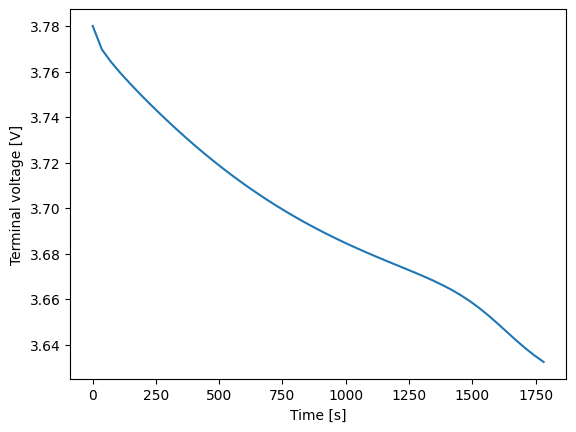

array([   0.        ,   18.18181818,   36.36363636,   54.54545455,
         72.72727273,   90.90909091,  109.09090909,  127.27272727,
        145.45454545,  163.63636364,  181.81818182,  200.        ,
        218.18181818,  236.36363636,  254.54545455,  272.72727273,
        290.90909091,  309.09090909,  327.27272727,  345.45454545,
        363.63636364,  381.81818182,  400.        ,  418.18181818,
        436.36363636,  454.54545455,  472.72727273,  490.90909091,
        509.09090909,  527.27272727,  545.45454545,  563.63636364,
        581.81818182,  600.        ,  618.18181818,  636.36363636,
        654.54545455,  672.72727273,  690.90909091,  709.09090909,
        727.27272727,  745.45454545,  763.63636364,  781.81818182,
        800.        ,  818.18181818,  836.36363636,  854.54545455,
        872.72727273,  890.90909091,  909.09090909,  927.27272727,
        945.45454545,  963.63636364,  981.81818182, 1000.        ,
       1018.18181818, 1036.36363636, 1054.54545455, 1072.72727

In [97]:
simulation = pybamm.Simulation(model)
simulation1 = pybamm.Simulation(model)
sol = simulation.solve([0, 1800])
sol.plot()

sol["Terminal voltage [V]"]
times = np.linspace(0, 3600, 100)
terminal_voltage = sol["Terminal voltage [V]"](times)

plt.plot(times, terminal_voltage)
plt.xlabel("Time [s]")
plt.ylabel("Terminal voltage [V]")
plt.show()

sol.t


In [78]:
terminal_voltage = sol["Terminal voltage [V]"].entries
print(terminal_voltage)

[3.77161546 3.76055544 3.75506514 3.75115486 3.74802806 3.74532311
 3.7428585  3.74053894 3.73831278 3.73615222 3.73404102 3.73196969
 3.72993241 3.7279264  3.72594884 3.72399956 3.72207725 3.72018168
 3.71831308 3.71647112 3.7146555  3.71286638 3.71110398 3.70936774
 3.707657   3.7059713  3.70431042 3.70267456 3.7010615  3.69946902
 3.69789722 3.69634515 3.69481241 3.69329685 3.69179828 3.69031646
 3.68885127 3.68740279 3.68597115 3.68455649 3.68315894 3.68177868
 3.68041571 3.67907012 3.67774192 3.67643095 3.67513724 3.67386068
 3.67260096 3.6713579  3.67013138 3.66892146 3.66772723 3.66654835
 3.66538511 3.66423677 3.66310307 3.66198355 3.66087753 3.65978488
 3.65870534 3.65763773 3.65658196 3.65553752 3.65450358 3.65347977
 3.65246501 3.65145875 3.65046021 3.64946853 3.64848275 3.64750178
 3.64652445 3.64554933 3.64457459 3.643599   3.64261883 3.64163327
 3.64063855 3.63962945 3.63860253 3.63755    3.63646514 3.63533771
 3.63415751 3.63291375 3.63159832 3.63020889 3.62875073 3.6272

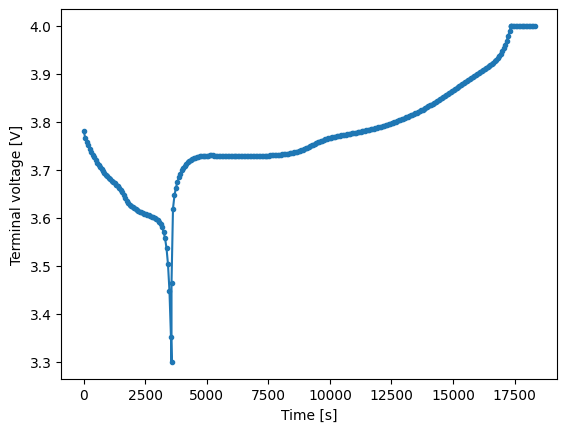

In [79]:
model = pybamm.lithium_ion.SPM()
parameter_values = pybamm.ParameterValues("Marquis2019")
parameter_values.update({
    "Current function [A]": "[input]",
})
experiment = pybamm.Experiment([
    "Discharge at 1C until 3.3 V",
    "Charge at 0.3C until 4.0 V",
    "Hold at 4.0 V until C/100",
])
simulation = pybamm.Simulation(
    model, 
    parameter_values=parameter_values,
    experiment=experiment,
)

solution = simulation.solve(inputs={"Current function [A]": 1})
times = solution.t
terminal_voltage = solution["Terminal voltage [V]"].entries
plt.plot(times, terminal_voltage, '.-')
plt.ylabel("Terminal voltage [V]")
plt.xlabel("Time [s]")
plt.show()

### Saving solutions

In [106]:
path = "/Users/felixwatson/Desktop/Summer placements/FUSE Ferren /Saves/ "
sol.save(path + "my_pybamm_solution.pkl")

In [107]:
sol2 = pybamm.load(path + "my_pybamm_solution.pkl")

In [108]:
sol.save_data(
    path + "tIV.pkl", ["Time [s]", "Current [A]", "Voltage [V]"]
)
sol.save_data(
    path + "tIV.csv", ["Time [s]", "Current [A]", "Voltage [V]"], to_format="csv"
)

## Lesson 5: Using submodels
[Submodels](https://docs.pybamm.org/en/latest/source/api/models/submodels/index.html)

In [109]:
model.submodels

{'external circuit': <pybamm.models.submodels.external_circuit.explicit_control_external_circuit.ExplicitCurrentControl at 0x330eda3a0>,
 'porosity': <pybamm.models.submodels.porosity.constant_porosity.Constant at 0x336766370>,
 'Negative interface utilisation': <pybamm.models.submodels.interface.interface_utilisation.full_utilisation.Full at 0x336766d30>,
 'Positive interface utilisation': <pybamm.models.submodels.interface.interface_utilisation.full_utilisation.Full at 0x336766220>,
 'negative particle mechanics': <pybamm.models.submodels.particle_mechanics.no_mechanics.NoMechanics at 0x336766250>,
 'positive particle mechanics': <pybamm.models.submodels.particle_mechanics.no_mechanics.NoMechanics at 0x3367667c0>,
 'negative primary active material': <pybamm.models.submodels.active_material.constant_active_material.Constant at 0x336766550>,
 'positive primary active material': <pybamm.models.submodels.active_material.constant_active_material.Constant at 0x336766cd0>,
 'electrolyte tr

### Thermal models

The thermal models available in PyBaMM are:

**Isothermal**: Temperature stays constant

**Lumped**: The temperature is taken to be homogeneous in the battery, so only the average temperature is computed.

**X-limped**: the temperature is taken to be homogeneous across the thickness of the cell, but can vary in the directions parallel to the current collectors. Need to be used in conjunction with a current collector model.

**X-full**: The temeprature is allowd to vary across the thickness of the cell

[Thermal models](https://docs.pybamm.org/en/latest/source/examples/notebooks/models/thermal-models.html)

In [118]:
thermal_models_types = ['isothermal', 'lumped', 'x-full']
thermal_models = []
output_variables = [
	'Total heating [W]', 
	['Volume-averaged Ohmic heating [W.m-3]',
 'Ohmic heating per unit electrode-pair area [W.m-2]',
 'Ohmic heating [W]'],  'Total heating per unit electrode-pair area [W.m-2]',
 'Total heating [W]',
 'Negative current collector Ohmic heating [W.m-3]',
 'Positive current collector Ohmic heating [W.m-3]',
]

for i in range(len(thermal_models_types)):
    model = pybamm.lithium_ion.DFN(options={"thermal": thermal_models_types[i]})
    thermal_models.append(model)
    simulation = pybamm.Simulation(model)
    sol = simulation.solve([0, 1800])
    sol.plot(output_variables=output_variables)

model.variable_names()


interactive(children=(FloatSlider(value=0.0, description='t', max=1800.0, step=18.0), Output()), _dom_classes=…

interactive(children=(FloatSlider(value=0.0, description='t', max=1800.0, step=18.0), Output()), _dom_classes=…

interactive(children=(FloatSlider(value=0.0, description='t', max=1800.0, step=18.0), Output()), _dom_classes=…

['Time [s]',
 'Time [min]',
 'Time [h]',
 'x [m]',
 'x_n [m]',
 'x_s [m]',
 'x_p [m]',
 'r_n [m]',
 'r_p [m]',
 'Current variable [A]',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Throughput capacity [A.h]',
 'Discharge energy [W.h]',
 'Throughput energy [W.h]',
 'Porosity',
 'Negative electrode porosity',
 'X-averaged negative electrode porosity',
 'Separator porosity',
 'X-averaged separator porosity',
 'Positive electrode porosity',
 'X-averaged positive electrode porosity',
 'Porosity change',
 'Negative electrode porosity change [s-1]',
 'X-averaged negative electrode porosity change [s-1]',
 'Separator porosity change [s-1]',
 'X-averaged separator porosity change [s-1]',
 'Positive electrode porosity change [s-1]',
 'X-averaged positive electrode porosity change [s-1]',
 'Negative electrode interface utilisation variable',
 'X-averaged negative electrode interface utilisation variable',
 'Negative electrode interface utilisation',


In [122]:
thermal_options = ["isothermal", "x-full", 'lumped']
solutions = []

for option in thermal_options:
	model = pybamm.lithium_ion.DFN(name=option, options={"thermal": option})
	simulation = pybamm.Simulation(model)
	solutions.append(simulation.solve([0, 3600]))

pybamm.dynamic_plot(
    solutions,
    output_variables=[
        "Negative particle surface concentration [mol.m-3]",
        "Electrolyte concentration [mol.m-3]",
        "Positive particle surface concentration [mol.m-3]",
        "Negative electrode potential [V]",
        "Electrolyte potential [V]",
        "Positive electrode potential [V]",
        "Current [A]",
        "Voltage [V]",
        "Cell temperature [K]",'Pressure [Pa]',
    ],
  )

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

### SEI growth
There are multiple ways of simulating SEI growth, and PyBaMM has the following options:

**None**: no SEI included

**Constant**: Includes an SEI layer which does not grow

**Reaction limited**: Assumes reaciton is the limiting phenomenon. It can also be specified to be asymmetric.

**Solvent-diffusion limited**: Assumes the solvent diffusion is the limiting phenomenon. [Marquis (2020)](https://ora.ox.ac.uk/objects/uuid:8afdcc34-cc42-48ba-b316-96a6d0f33a45)

**Electron-migration limited**: Assumes the migration of electrons is the limiting phenomenon. [Marquis (2020)](https://ora.ox.ac.uk/objects/uuid:8afdcc34-cc42-48ba-b316-96a6d0f33a45)

**Interstitial-diffusion limited**: Assumes the diffusion of lithium-ion intestitials is the limiting phenomenon. [Marquis (2020)](https://ora.ox.ac.uk/objects/uuid:8afdcc34-cc42-48ba-b316-96a6d0f33a45)

**EC reaciton limited**: Assumes the model is limited by both reaction and diffusions. [Yang et al (2017)](https://www.sciencedirect.com/science/article/abs/pii/S0378775317307619)

[SEI Growth submodels](https://docs.pybamm.org/en/latest/source/api/models/base_models/base_battery_model.html#pybamm.BatteryModelOptions)

In [123]:
model = pybamm.lithium_ion.DFN(name=option, 'SEI porosity change': "true")
simulation = pybamm.Simulation(model)
sol3 = simulation.solve(0, 3600, 100)
sol3.plot()

SyntaxError: invalid syntax (4133385731.py, line 1)

In [128]:
SEI_options = [
    "reaction limited", 
    "solvent-diffusion limited", 
    "interstitial-diffusion limited"
]
solutions = []

for option in SEI_options:
	model = pybamm.lithium_ion.DFN(
        name=option, 
        options={"SEI": option, "SEI porosity change": "true"}
    )
	simulation = pybamm.Simulation(model)
	solutions.append(simulation.solve([0, 3600]))

pybamm.dynamic_plot(
    solutions,
    output_variables=[
        'Loss of capacity to positive SEI [A.h]', 'Loss of capacity to negative SEI [A.h]', 'Loss of capacity to positive SEI on cracks [A.h]',
        'Positive total SEI thickness [m]', 'Negative total SEI thickness [m]', 'Positive outer SEI thickness [m]',
        'X-averaged positive SEI thickness [m]', 'X-averaged negative SEI thickness [m]', 'X-averaged positive total SEI thickness [m]',
        "Voltage [V]",
        "Negative electrode porosity",
        "X-averaged negative electrode porosity",
    ],
  )

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

### Particle mechanics

The models available on PyBaMM are:

**None**: No mechanical effects included

**Swelling only**: Accounts for the deformation of the particles in the lithiation-delithiation cycle

**Swelling and cracking**: Accounts for swelling and also crack formation on the particle surface

In [ ]:
model = pybamm.lithium_ion.DFN(
    options={"particle mechanics": ("swelling only", "none")}
)

	simulation = pybamm.Simulation(model)
	solutions.append(simulation.solve([0, 3600]))

In [132]:
model = pybamm.lithium_ion.DFN(
    options={"particle mechanics": ("swelling only", "swelling and cracking")}
)
parameter_values = pybamm.ParameterValues("Ai2020")
simulation = pybamm.Simulation(model, parameter_values=parameter_values)
solution = simulation.solve([0, 3600])

solution.plot([
    "Negative particle surface radial stress [Pa]",
    "Negative particle surface tangential stress [Pa]",
    "Negative particle surface displacement [m]",
	"Negative particle crack length [m]",
    "Positive particle surface radial stress [Pa]",
    "Positive particle surface tangential stress [Pa]",
    "Positive particle surface displacement [m]",
    "Positive particle crack length [m]",
])

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

## Lesson 6: Final excercises

### Excercise 1: Coupled degredation mechanisms

# PyBaMM Model Development

## Lesson 1: ODE models in PyBaMM

### A simple ODE  battery model

The reservoir model is as follows:

$$\begin{align*}\frac{dx_n}{dt}&=-\frac{I(t)}{Q_n},\\
\frac{dx_p}{dt}&=\frac{I(t)}{Q_p},\\
V(t)&=U_p(x_p)-U_n(x_n)-I(t)R,\\
x_n(0)&=x_{n0},\\
x_p(0)&=x_{p0},
\end{align*}$$

where $x_n$​ and $x_p$ are the dimensionless stochiometries of the negative and positive electrodes, $I(t)$ is the current, $Q_n$ and $Q_p$ are the capacities of the negative and positive electrodes, $U_p(x_p)$ and $U_n(x_n)$ are the open circuit potentials of the positive and negative electrodes, and $R$ is the resistance of the battery.

#### PyBaMM variables

In [133]:
x_n = pybamm.Variable("Negative electrode stochiometry")
x_p = pybamm.Variable("Positive electrode stochiometry")

#### PyBaMM parameters

In [134]:
i = pybamm.FunctionParameter("Current function [A]", {"Time [s]": pybamm.t})
x_n_0 = pybamm.Parameter("Initial negative electrode stochiometry")
x_p_0 = pybamm.Parameter("Initial positive electrode stochiometry")
U_p = pybamm.FunctionParameter("Positive electrode OCV [V]", {"x_p": x_p})
U_n = pybamm.FunctionParameter("Negative electrode OCV [V]", {"x_n": x_n})
Q_n = pybamm.Parameter("Negative electrode capacity [A.h]")
Q_p = pybamm.Parameter("Positive electrode capacity [A.h]")
R = pybamm.Parameter("Electrode resistance [Ohm]")

#### A PyBaMM Model

In [136]:
model = pybamm.BaseModel("reservoir model")
model.rhs[x_n] = -i / Q_n
model.initial_conditions[x_n] = x_n_0
model.rhs[x_p] = i / Q_p
model.initial_conditions[x_p] = x_p_0

model.variables["Voltage [V]"] = U_p - U_n -  i * R
model.variables["Negative electrode stochiometry"] = x_n
model.variables["Positive electrode stochiometry"] = x_p

model.rhs[x_n].visualise("x_n_rhs.png")

2024-06-21 15:00:30.855 - [ERROR] symbol.visualise(498): Please install graphviz>=2.42.2 to use dot exporter
